<a href="https://colab.research.google.com/github/hellosmallkat/SQL-Basics-for-Epidemiological-Research/blob/main/Finished_SQL_Basics_for_Epidemiological_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1 align="center">
    NSDC Data Science Capsule Projects
</h1>

<h2 align="center">
    Project: SQL Basics for Epidemiological Research
</h2>

<h3 align="center">
    Name: hellosmallkat
</h3>


### **Please read before you begin your project**

This notebook will guide you through the process of analyzing a COVID-19 dataset using SQL queries in Python.

**Instructions: Google Colab Notebooks:**

Google Colab is a free cloud service. It is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources. We will be using Google Colab for this project.

In order to work within the Google Colab Notebook, **please start by clicking on "File" and then "Save a copy in Drive."** This will save a copy of the notebook in your personal Google Drive.

Please rename the file to "SQL for Epidemiology - Your Full Name." Once this project is completed, you will be prompted to share your file with the National Student Data Corps (NSDC) Project Leaders.

The notebook is provided with blanks "_________" and a comment instructing you on what needs to be done. You need to fill the space with the correct code to make sure you get the desired output.

You can now start working on the project. :)

**Project Description:**

To work with the Covid-19 dataset in this project, you'll need to create and connect to an SQLite database as seen in the steps within this notebook.

**Key Features**

- Practical SQL exercises with step-by-step instructions.
- Real-world datasets for hands-on experience.
- Comprehensive explanations of SQL queries and concepts.
- Interactive coding examples and challenges.

**Dataset**
Our World in Data COVID-19 Dataset: This dataset provides comprehensive data on COVID-19 cases, deaths, testing, and vaccination worldwide.
- You can find the dataset on Kaggle: [Kaggle Link](https://www.kaggle.com/datasets/bolkonsky/covid19)
- Download the dataset from the provided link and save it as 'covid19.csv' on your computer.
- On Google Colab, click on the "Upload" button and select the 'covid19.csv' file from your local computer.

## Introduction
This SQL project is designed for beginners who want to practice writing SQL queries using a real-world dataset. In this project, we will work with the Covid-19 dataset. The main goal is to help you become familiar with SQL syntax and basic data analysis tasks. Make sure to complete the code where there is a 'TODO' sign. Hints are provided along the way.

## Table of Contents
1. [Libraries and Database Setup](#libraries-and-database-setup)
2. [Loading the Dataset](#loading-the-dataset)
3. [Basic SQL Queries](#basic-sql-queries)
4. [Filtering Data](#filtering-data)
5. [Aggregating Data](#aggregating-data)
6. [Grouping Data](#grouping-data)
7. [Sorting Data](#sorting-data)
8. [Joining Tables](#joining-tables)
9. [Subqueries](#subqueries)
10. [Window Functions](#window-functions)
11. [Data Analysis and Visualization](#data-analysis-and-visualization)
12. [Closing Connection](#closing-connection)
13. [Summary of Basic SQL Commands](#summary-of-basic-sql-commands)


## Milestone 1: Importing Libraries and Dataset
In this milestone, we will import the necessary libraries and load the COVID-19 dataset into a pandas DataFrame.

In [1]:
# Importing necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# Load the dataset
df = pd.read_csv('covid19.csv')  # Update with the correct local path

# Display the first few rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


## Milestone 2: Setting Up SQLite Database
Here, we will create an SQLite database and import the DataFrame into an SQL table.

In [4]:
# Create a connection to SQLite database
conn = sqlite3.connect('covid19.db')
cursor = conn.cursor()

# Convert DataFrame to SQL
df.to_sql('covid19_data', conn, if_exists='replace', index=False)

44785

## Milestone 3: Basic SQL Queries
In this milestone, we will perform some basic SQL queries to select columns and rows from the table.

In [5]:
# Write a query to generate all columns and limit the rows to 10
query_1 = "SELECT * FROM covid19_data LIMIT 10;"

# Write a query to select 'location', 'total_cases', and 'total_deaths' columns from the 'covid19_data' table and limit the result to 10 rows.
query_2 = "SELECT location, total_cases,total_deaths FROM covid19_data LIMIT 10 ;"

# Execute the queries
result_1 = pd.read_sql_query(query_1, conn)
result_2 = pd.read_sql_query(query_2, conn)

# Display results
print(result_1)
print(result_2)

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-04          0.0        0.0   
5      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
6      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
7      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
8      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
9      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0       

## Milestone 4: Filtering Data
We will use the `WHERE` clause and logical operators to filter data based on specific conditions.

In [6]:
# Write a query to select all columns from the 'covid19_data' table where the 'location' is 'United States' and limit the result to 10 rows.
query_3 = "SELECT * FROM covid19_data WHERE location =  'United States' LIMIT 10;"

# Write a query to select all columns from the 'covid19_data' table where the 'location' is 'United States' and 'new_cases' are greater than 10,000.
query_4 = "SELECT * FROM covid19_data WHERE location = 'United States' AND new_cases > 10000 LIMIT 10 ;"

# Execute the queries
result_3 = pd.read_sql_query(query_3, conn)
result_4 = pd.read_sql_query(query_4, conn)

# Display results
print(result_3)
print(result_4)

  iso_code      continent       location        date  total_cases  new_cases  \
0      USA  North America  United States  2019-12-31          0.0        0.0   
1      USA  North America  United States  2020-01-01          0.0        0.0   
2      USA  North America  United States  2020-01-02          0.0        0.0   
3      USA  North America  United States  2020-01-03          0.0        0.0   
4      USA  North America  United States  2020-01-04          0.0        0.0   
5      USA  North America  United States  2020-01-05          0.0        0.0   
6      USA  North America  United States  2020-01-06          0.0        0.0   
7      USA  North America  United States  2020-01-07          0.0        0.0   
8      USA  North America  United States  2020-01-08          0.0        0.0   
9      USA  North America  United States  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0       

## Milestone 5: Aggregating Data
Next, we will use aggregate functions like `COUNT`, `SUM`, `AVG`, `MIN`, and `MAX` to summarize data.

In [7]:
# Using COUNT, SUM, AVG, MIN, MAX
# Write a query to count the total number of records in the 'covid19_data' table.
query_5 = "SELECT COUNT(*) FROM covid19_data;"

# Write a query to calculate the sum of 'total_cases' in the 'covid19_data' table.
query_6 = "SELECT SUM(total_cases) FROM covid19_data;"

# Write a query to calculate the average of 'new_cases' in the 'covid19_data' table.
query_7 = "SELECT AVG(new_cases) FROM covid19_data;"

# Write a query to find the minimum value of 'total_deaths' in the 'covid19_data' table.
query_8 = "SELECT MIN(total_deaths) FROM covid19_data;"

# Write a query to find the maximum value of 'total_deaths' in the 'covid19_data' table.
query_9 = "SELECT MAX(total_deaths) FROM covid19_data;"

# Execute the queries
result_5 = pd.read_sql_query(query_5, conn)
result_6 = pd.read_sql_query(query_6, conn)
result_7 = pd.read_sql_query(query_7, conn)
result_8 = pd.read_sql_query(query_8, conn)
result_9 = pd.read_sql_query(query_9, conn)

# Display results
print(result_5)
print(result_6)
print(result_7)
print(result_8)
print(result_9)

   COUNT(*)
0     44785
   SUM(total_cases)
0      4.140805e+09
   AVG(new_cases)
0     1388.770224
   MIN(total_deaths)
0                0.0
   MAX(total_deaths)
0           952724.0


## Milestone 6: Grouping Data
We will use the `GROUP BY` clause to group data and the `HAVING` clause to filter groups.

In [8]:
# Write a query to calculate the average of 'new_cases' for each 'location' in the 'covid19_data' table, grouping the data by location.
query_10 = "SELECT AVG(new_cases) FROM covid19_data GROUP BY location;"

# Write a query to calculate the average of 'new_cases' for each 'location' in the 'covid19_data' table, grouping by location, and filtering the groups to only include those with an average of new cases greater than 1,000.
query_11 = "SELECT AVG(new_cases) FROM covid19_data GROUP BY location HAVING AVG(new_cases) > 1000;"

# Execute the queries
result_10 = pd.read_sql_query(query_10, conn)
result_11 = pd.read_sql_query(query_11, conn)

# Display results
print(result_10)
print(result_11)

     AVG(new_cases)
0        153.224409
1         61.912821
2        190.783784
3          8.231579
4         20.818681
..              ...
207        5.210884
208   115683.507576
209       12.417178
210       75.794595
211       41.786885

[212 rows x 1 columns]
    AVG(new_cases)
0      3054.314721
1      1829.656085
2     17027.208333
3      2225.261307
4      3888.450777
5      1623.848485
6      1022.992424
7     20182.562738
8      1576.507576
9      1189.656489
10     1117.166667
11     2691.226562
12     1177.725869
13     3859.244898
14     1075.100000
15     4133.280303
16     1660.202020
17     3355.239796
18     2433.612167
19     1577.947368
20     1461.878788
21    25472.223485
22   115683.507576


## Milestone 7: Sorting Data
In this milestone, we will use the `ORDER BY` clause to sort data based on specific columns.

In [9]:
# Write a query to select 'location' and 'total_cases' from the 'covid19_data' table, ordering the results by 'total_cases' in descending order and limiting the output to the top 10 rows.
query_12 = "SELECT location AND total_cases FROM covid19_data ORDER BY total_cases DESC LIMIT 10;"

# Execute the query
result_12 = pd.read_sql_query(query_12, conn)

# Display result
print(result_12)

   location AND total_cases
0                         0
1                         0
2                         0
3                         0
4                         0
5                         0
6                         0
7                         0
8                         0
9                         0


## Milestone 8: SQL Joins - Combining Tables
In this milestone, we will perform an `INNER JOIN` to combine rows from two or more tables based on a related column.

To better understand SQL Joins and the different types of Joins, check out this [resource by W3Schools](https://www.w3schools.com/sql/sql_join.asp). Then begin the section below.


In [10]:
# Assuming another table 'vaccination_data' exists
# Create a sample vaccination_data table
vaccination_data = {
    'location': ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom'],
    'total_vaccinations': [300000000, 250000000, 200000000, 150000000, 100000000]
}
vaccination_df = pd.DataFrame(vaccination_data)
vaccination_df.to_sql('vaccination_data', conn, if_exists='replace', index=False)

# Write a query to join 'covid19_data' and 'vaccination_data' tables, selecting 'location', 'total_cases', and 'total_vaccinations', using an INNER JOIN on the 'location' column.
query_13 = """
SELECT covid19_data.location, covid19_data.total_cases, vaccination_data.total_vaccinations
FROM covid19_data
INNER JOIN vaccination_data ON covid19_data.location = vaccination_data.location;
"""
#FROM ___________ c
#INNER JOIN ___________ v ON c.___________ = v.___________;
# Execute the query
result_13 = pd.read_sql_query(query_13, conn)

# Display result
print(result_13)

           location  total_cases  total_vaccinations
0            Brazil          0.0           200000000
1            Brazil          0.0           200000000
2            Brazil          0.0           200000000
3            Brazil          0.0           200000000
4            Brazil          0.0           200000000
...             ...          ...                 ...
1315  United States    6554820.0           300000000
1316  United States    6606293.0           300000000
1317  United States    6630891.0           300000000
1318  United States    6674458.0           300000000
1319  United States    6724667.0           300000000

[1320 rows x 3 columns]


## Milestone 9: Subqueries
We will use subqueries in the `SELECT` clause to further refine our data.

In [12]:
# Using subquery in SELECT
# Write a query to select 'location' and 'total_cases' from the 'covid19_data' table and include the average of 'total_cases' as a subquery.

query_14 = """
SELECT location, total_cases,
       (SELECT AVG(total_cases) FROM covid19_data) as total_cases
FROM covid19_data;
"""

# Execute the query
result_14 = pd.read_sql_query(query_14, conn)

# Display result
print(result_14)

            location  total_cases   total_cases
0        Afghanistan          0.0  93721.529039
1        Afghanistan          0.0  93721.529039
2        Afghanistan          0.0  93721.529039
3        Afghanistan          0.0  93721.529039
4        Afghanistan          0.0  93721.529039
...              ...          ...           ...
44780  International        696.0  93721.529039
44781  International        696.0  93721.529039
44782  International        696.0  93721.529039
44783  International        696.0  93721.529039
44784  International        696.0  93721.529039

[44785 rows x 3 columns]


## Milestone 10: Window Functions
We will use window functions like `ROW_NUMBER()`, `RANK()`, `DENSE_RANK()`, `NTILE()`, `LEAD()`, `LAG()` to perform operations across a set of table rows.

In [13]:
# Using ROW_NUMBER(), RANK(), DENSE_RANK(), NTILE(), LEAD(), LAG()
# Write a query to select 'location', 'date', and 'new_cases' from the 'covid19_data' table. Use ROW_NUMBER(), RANK(), and DENSE_RANK() functions, partitioned by 'location', and ordered by 'date' and 'new_cases' respectively.
query_15 = """
SELECT location, date, new_cases,
       ROW_NUMBER() OVER(PARTITION BY location ORDER BY date, new_cases) as ___________,
       RANK() OVER(PARTITION BY location ORDER BY date, new_cases DESC) as ___________,
       DENSE_RANK() OVER(PARTITION BY location ORDER BY date,new_cases DESC) as ___________
FROM covid19_data;
"""

# Execute the query
result_15 = pd.read_sql_query(query_15, conn)

# Display result
print(result_15)

          location        date  new_cases  ___________  ___________  \
0      Afghanistan  2019-12-31        0.0            1            1   
1      Afghanistan  2020-01-01        0.0            2            2   
2      Afghanistan  2020-01-02        0.0            3            3   
3      Afghanistan  2020-01-03        0.0            4            4   
4      Afghanistan  2020-01-04        0.0            5            5   
...            ...         ...        ...          ...          ...   
44780     Zimbabwe  2020-09-15        5.0          179          179   
44781     Zimbabwe  2020-09-16       45.0          180          180   
44782     Zimbabwe  2020-09-17       22.0          181          181   
44783     Zimbabwe  2020-09-18       35.0          182          182   
44784     Zimbabwe  2020-09-19       14.0          183          183   

       ___________  
0                1  
1                2  
2                3  
3                4  
4                5  
...            ...  


## Milestone 11: Data Analysis and Visualization
In this final milestone, we will use SQL queries to extract data for analysis and create visualizations using `matplotlib`.

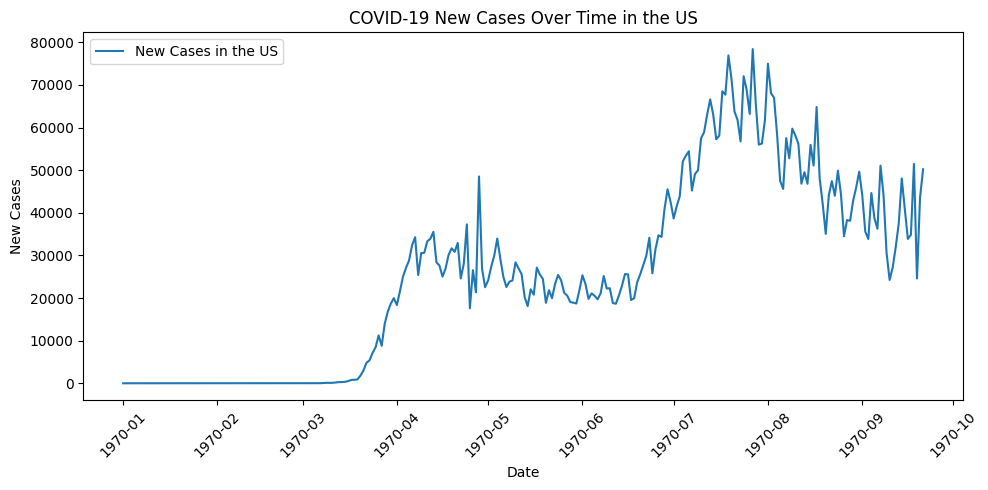

In [14]:
# Write a query to select 'date' and 'new_cases' from the 'covid19_data' table for records where the 'location' is 'United States'.
query_16 = "SELECT date, new_cases FROM covid19_data WHERE location='United States';"
us_data = pd.read_sql_query(query_16, conn)


# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(us_data['date'], us_data['new_cases'], label='New Cases in the US')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('COVID-19 New Cases Over Time in the US')
plt.legend()

# Format the x-axis for dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Final Submission**
Thank you for completing the project!
Please submit all materials to the NSDC HQ team at er3101@columbia.edu in order to receive a virtual certificate of completion. Do reach out to us if you have any questions or concerns. We are here to help you learn and grow.